# Simulation - Final Project
### - Mahdi Mohammadi - 9825041
### - Pedram Peiro Asfia - 9825006

# Library

In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import random
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)

# Random Number Generation

In [2]:
def RNG(a,m,X0,c):
    return (a*X0+c)%m

flag = True
#The first number of the sequnce
randnum = [1]
while(flag):
    r = RNG(5,2**21,randnum[-1],3)
    if(r != 1): #Check whether we entered the loop or not
        randnum.append(r)
    else:
        flag = False
randnum = np.array(randnum)/(2**21) #Scaling random numbers
randnum = list(randnum)
print(f"{len(randnum)} random numbers have been generated")
print(randnum[:5])

2097152 random numbers have been generated
[4.76837158203125e-07, 3.814697265625e-06, 2.0503997802734375e-05, 0.00010395050048828125, 0.0005211830139160156]


### Uniformity Test Function

In [3]:
def uniformity_test(sample_random):
    N=len(sample_random)
    sorted_rnd = sorted(sample_random)
    D_plus=[]
    D_minus=[]
    for i in range(N):
        D_plus.append((i+1)/N-sorted_rnd[i])
        D_minus.append(sorted_rnd[i]-i/N)
    D=max(max(D_plus) , max(D_minus))
    critical_value = 1.36/N**0.5
    print('D is {}\ncritical value is {}'.format(D,critical_value))
    if D>critical_value:
        print('Reject Null Hypothesis')
    else: print('Not Enough Evidence to Reject The Null Hypothesis')

### Independency Test Function

In [4]:
def independency_test(sample_random):
    N=len(sample_random)
    M=N-2

    rho_hat=np.sum([(sample_random[i]*sample_random[i+1]) for i in range(N-1)])/(M+1)-0.25
    sigma_hat=((13*M+7)**0.5)/(12*(M+1))
    Z=rho_hat/sigma_hat
    print('rho_hat = {}\nsigma_hat = {}\nZ = {}'.format(rho_hat,sigma_hat,Z))

    pval=st.norm.sf(abs(Z))*2
    print('p-value is {}'.format(pval))
    if pval<=0.05:
        print('Reject Null Hypothesis')
    else: print('Not Enough Evidence to Reject The Null Hypothesis')

### Sampling 1,000,000 Numbers from the Population

In [5]:
sample_random = random.sample(list(randnum),1000000)
if 0 in sample_random: sample_random.remove(0)
print(sample_random[:5])

[0.9481716156005859, 0.2673153877258301, 0.6183724403381348, 0.5718069076538086, 0.49845409393310547]


### Tests Results

In [6]:
print('Results for Uniformity Test:')
uniformity_test(sample_random)
print('\n\nResults for Independency Test: ')
independency_test(sample_random)

Results for Uniformity Test:
D is 0.0006498953804633389
critical value is 0.0013600006800005102
Not Enough Evidence to Reject The Null Hypothesis


Results for Independency Test: 
rho_hat = -4.386785863227938e-05
sigma_hat = 0.0003004628374139822
Z = -0.1460009464393015
p-value is 0.8839206412836127
Not Enough Evidence to Reject The Null Hypothesis


# Random Variates Generation

**Function for generating normal random variates**

In [7]:
def normal_generator(r1,r2,mu,sigma):
    Z=((-2*np.log(r1))**0.5)*np.cos(2*math.pi*r2)
    X=mu+sigma*Z
    return X

Number of simulations

In [8]:
number_of_sim = 50

# PART A

## Defining Variables (for statistics)

**Number of servers in each section**

In [9]:
serverA=1
serverB=3
serverC=1
serverD=4
serverE=3
TotalServers=serverA+serverB+serverC+serverD+serverE

In [10]:
iteration=0
Demographic_list_A=[]
TWT_list_A=[]
N_list_A=[]
SVR_list_A=[]
TotalQ_list_A=[]
max_WT_list_A=[]
FEL_total_A=[]
MTOT_list_A=[]
rcounter=0

In [11]:
while iteration<number_of_sim:
    arr_ID=0                               # Total number of entered machines (equivalent to ID)
    MTOT=0                                 #Total number of machines entered between 120 till 600
    Status=np.zeros(TotalServers)          # Status of Server I (0=idle, 1=busy)
    Q=np.zeros(5)                          # Number of machines waiting in ith queue
    TotalQ=np.zeros(5)                     # Total number of machines waited in ith queue
    SVR=np.zeros(TotalServers)             # Service time of server i
    Tnow=0
    T1=120
    T2=600
    TWT=0
    NF=0
    max_WT=0
    N=np.zeros(TotalServers)      # Total number of served machines by server i
    RespTime=[]                   # Response time (equals to departure time – arrival time)
    FEL=[(0,0,1,0,1),(0,0,0,0,2),(3,180,-1,0,0)]    
    '''
    List of Tuples – All future events are saved in this list with this format: 
        •Code
        •Time
        •Priority (1 for yes, 0 for no)
        •Rework, whether the machine needs rework or not (1 for rework, 0 for no need for rework)
        •ID of the machine
    '''
    FEL_backup=[]                 # backup of FEL (saves every event)
    Q_A=[]                        # machines waiting in queue of server A; format: (ID,time,priority)
    Q_B=[]
    Q_C=[]
    Q_D=[]
    Q_E=[]

    Demographic={}                  
    '''
    Dictionary – containing following info: 
        •ID of machine
        •Arrival time, machine’s arrival time.
        •Type of the order, whether it has a priority or not (1 for priority, 0 for non-priority)
        •Rework, whether the machine needs rework or not (1 for rework, 0 for no need for rework)
    the ID is used as key and other info is used as value in this dictionary.
    '''
    while (Tnow <= T2) or (len(FEL)!=0):
        
        # arrival event
        if FEL[0][0]==0:
            code_type=FEL[0][2]
            arr_ID+=1
            
            FEL[0]=(FEL[0][0] , FEL[0][1],FEL[0][2],FEL[0][3],arr_ID)            
            Demographic[arr_ID]=Tnow            
            if (Tnow>=T1) and (Tnow<=T2): MTOT+=1

            if code_type==0: #ordinary
                
                #interarrival for ordinary order
                InterArrival=normal_generator(sample_random[rcounter],sample_random[rcounter+1], 16,12)   
                rcounter+=2
                if (Tnow+InterArrival <=T2):
                    #add arrival event of non-priority order
                    FEL.append((0 , Tnow+InterArrival,0,0,-2))

            elif code_type==1:
                 #interarrival for priority order
                InterArrival=normal_generator(sample_random[rcounter],sample_random[rcounter+1] , 5,2)    
                rcounter+=2
                if (Tnow+InterArrival <=T2):
                    #add arrival event of priority order
                    FEL.append((0 , Tnow+InterArrival,1,0,-2))               

            if Status[0]==0:
                
                Status[0]=1
                ST = abs(normal_generator(sample_random[rcounter],sample_random[rcounter+1] , 2,13))
                rcounter+=2
                
                if (Tnow>=T1) and (Tnow<=T2): 
                    SVR[0]+=min(T2-Tnow,ST)
                    N[0]+=1
                FEL.append((1 , Tnow+ST , code_type,0,FEL[0][4]))
                
            else:
                Q_A.append((FEL[0][4] , Tnow , code_type,0))    # (ID, Time, priority or not , rework or not)
                Q[0]+=1
                if (Tnow>=T1) and (Tnow<=T2): TotalQ[0]+=1
         
        
        # departure from server A
        elif FEL[0][0]==1:
            code_type=FEL[0][2]                            # for the machine that is leaving NOW
            if FEL[0][3]==0:                               #(if there was no rework for the current machine)
     
                if Q[0]==0:
                    Status[0]=0                                           # server 1 (A) is idle now
                else:
                    Q[0]-=1
                    if (Tnow>=T1) and (Tnow<=T2): N[0]+=1
                    ID=-1
                    for x in Q_A:  #priority chekcing
                        if x[2]==1:
                            code_type_=1
                            rework=x[3]
                            ID=x[0]
                            if Tnow>=T1:
                                WT= min(Tnow,T2)-max(x[1],T1)
                                if WT>0:
                                    max_WT=max(WT,max_WT)
                                    TWT+=WT
                            Q_A.remove(x)
                            break
                    if ID==-1:    #ordinary chcecking
                        code_type_=0
                        rework=Q_A[0][3]
                        ID=Q_A[0][0]
                        if Tnow>=T1:
                            WT = min(Tnow,T2) - max(Q_A[0][1],T1) 
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_A.pop(0)
                        
                    ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],2,13))
                    rcounter+=2
                    if (Tnow>=T1) and (Tnow<=T2): SVR[0]+=min(T2-Tnow,ST)
                    FEL.append((1 , Tnow+ST,code_type_,rework,ID))         # Future departure event from server 1 
                    
            # arrival event to B (under departure event from A) (for current machine)
            for i in range(1,4):
                if Status[i]==0:
                    Status[i]=1
                    if (Tnow>=T1) and (Tnow<=T2): N[i]+=1
                    if FEL[0][3]==1:
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],27,8))
                        rcounter+=2

                    else: 
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],20,39))
                        rcounter+=2
                        
                    if (Tnow>=T1) and (Tnow<=T2): SVR[i]+=min(T2-Tnow,ST)
                    
                    FEL.append((i+1 , Tnow+ST,code_type,FEL[0][3],FEL[0][4]))        # Future departure event from server i=2,3,4           
                    break

                elif i==3:
                    Q_B.append((FEL[0][4] , Tnow , code_type,FEL[0][3]))
                    Q[1]+=1
                    if (Tnow>=T1) and (Tnow<=T2): TotalQ[1]+=1

        # departure from server B
        elif FEL[0][0] in [2,3,4]:  
            code_type=FEL[0][2]                                       # for the machine that is leaving server B NOW
            
            if code_type==-1:                                         # breakdown of machine C event
                if (Tnow>=T1) and (Tnow<=T2): NF+=1
                if Status[4]==0:
                    Status[4]=1
                    FT=normal_generator(sample_random[rcounter] , sample_random[rcounter+1],10,2)
                    rcounter+=2
                    FEL.append((5 , Tnow+FT ,-1 , 0,0))
                else:
                    Q_C.append((0 , Tnow , -1))
                    Q[2]+=1  
            else:
                if Q[1]==0:                                               # Q[1] is queue of server B
                    Status[FEL[0][0]-1]=0                                 # server i=2/3/4 (from B) is idle now
                else:
                    Q[1]-=1
                    if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                    ID=-1
                    for x in Q_B:  #priority chekcing
                        if x[2]==1:
                            code_type_=1
                            rework=x[3]
                            ID=x[0]
                            if Tnow>=T1:
                                WT = min(Tnow,T2) - max(x[1],T1)
                                if WT>0:
                                    max_WT=max(WT,max_WT)
                                    TWT+=WT
                            Q_B.remove(x)
                            break
                    if ID==-1:    #ordinary chcecking
                        code_type_=0
                        rework=Q_B[0][3]
                        ID=Q_B[0][0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(Q_B[0][1],T1)  
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_B.pop(0)
                        
                    if rework==1:
                        ST= abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],27,8))
                        rcounter+=2

                    else: 
                        ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],20,39))
                        rcounter+=2
                    if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                    
                    # departure event from server i=2 or 3 or 4
                    FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))

                #arrival event to C (under departure event from B)
                if (FEL[0][3]==0) and (sample_random[rcounter]<=0.6):    # (send the machine to C if rework==0 and rnd<=0.6)
                    rcounter+=1
                    if Status[4]==0:
                        Status[4]=1
                        ST=20
                        if (Tnow>=T1) and (Tnow<=T2): 
                            N[4]+=1
                            SVR[4]+=min(T2-Tnow,ST)
                        FEL.append((5 , Tnow+ST,code_type,0,FEL[0][4]))

                    else:
                        Q_C.append((FEL[0][4] , Tnow , code_type))
                        Q[2]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[2]+=1

                #arrival event to D (under departure event from B)
                else:
                    rcounter+=1
                    for i in range(5,9):
                        if Status[i]==0:
                            Status[i]=1
                            if (Tnow>=T1) and (Tnow<=T2): N[i]+=1
                            ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47)) 
                            rcounter+=2
                            if (Tnow>=T1) and (Tnow<=T2): SVR[i]+=min(T2-Tnow,ST)
                            FEL.append((i+1 , Tnow+ST,code_type,FEL[0][3],FEL[0][4]))
                            break

                        elif i==8:
                            Q_D.append((FEL[0][4] , Tnow , code_type,FEL[0][3]))
                            Q[3]+=1
                            if (Tnow>=T1) and (Tnow<=T2): TotalQ[3]+=1           


        # departure from server C
        elif FEL[0][0]==5:
            code_type=FEL[0][2]                                       # for the machine leaving server C NOW
            if Q[2]==0:                                               # Q[2] is queue of server C
                Status[4]=0                                           # server 5 (from C) is idle now
                
            else:
                Q[2]-=1
                ID=-2
                for x in Q_C:  #breakdown checking
                    if x[2]==-1:
                        ID=x[0]
                        Q_C.remove(x)
                        FT = normal_generator(sample_random[rcounter] , sample_random[rcounter+1],10,2)
                        rcounter+=2
                        FEL.append((5 , Tnow+FT , -1 , 0,0))
                        break
                if ID==-2:    
                    code_type_=Q_C[0][2]
                    ID=Q_C[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_C[0][1],T1)  
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_C.pop(0)
                    ST = 20
                    if (Tnow>=T1) and (Tnow<=T2): SVR[4]+=min(T2-Tnow,ST); N[4]+=1
                    FEL.append((5 , Tnow+ST,code_type_,0,ID))     # departure event from server i=5
                    
                    
            # adding next event of breakdown
            if (code_type==-1) and (sum([Status[i] for i in range(12) if i!=4])>0) :               
                FEL.append((3,Tnow+120,-1,0,0))

            #arrival event to D (under departure event from C) (for the current machine leaving C)
            elif code_type!=-1:
                for i in range(5,9):
                    if Status[i]==0:
                        Status[i]=1
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47))
                        rcounter+=2
                        if (Tnow>=T1) and (Tnow<=T2):
                            N[i]+=1
                            SVR[i]+=ST
                        FEL.append((i+1 , Tnow+ST,code_type,0,FEL[0][4]))
                        break

                    elif i==8:
                        Q_D.append((FEL[0][4] , Tnow , code_type,0))
                        Q[3]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[3]+=1



        # departure from server D
        elif FEL[0][0] in [6,7,8,9]:
            code_type=FEL[0][2]
            if Q[3]==0:                            # Q[3] is queue of server D
                Status[FEL[0][0]-1]=0              # server i=6 or 7 or 8 or 9 (from B) is idle now
                
            else:
                Q[3]-=1
                if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                ID=-1
                for x in Q_D:  #priority chekcing
                    if x[2]==1:
                        code_type_=1
                        rework=x[3]
                        ID=x[0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(x[1],T1)
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_D.remove(x)
                        break
                if ID==-1:    #ordinary chcecking
                    code_type_=0
                    rework=Q_D[0][3]
                    ID=Q_D[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_D[0][1],T1)
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_D.pop(0)

                ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47))
                rcounter+=2
                if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                
                FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))   # departure event from server i=6/7/8/9
                
            #arrival event to E (under departure event from D)
            if (FEL[0][3]==1) or (sample_random[rcounter]<=0.9):
                rcounter+=1
                for i in range(9,12):
                    if Status[i]==0:
                        Status[i]=1
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],4,42))
                        rcounter+=2
                        if (Tnow>=T1) and (Tnow<=T2):
                            N[i]+=1
                            SVR[i]+=min(T2-Tnow,ST)
                        FEL.append((i+1 , Tnow+ST , code_type , FEL[0][3],FEL[0][4]))
                        break
                    elif i==11:
                        Q_E.append((FEL[0][4] , Tnow , code_type , FEL[0][3]))
                        Q[4]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[4]+=1

            #Rewrok to B (under departure event from D)
            else:
                rcounter+=1
                FEL.append((1 , Tnow , code_type , 1,FEL[0][4]))

        # departure from server E
        elif FEL[0][0] in [10,11,12]:
            Demographic[FEL[0][4]]=(Demographic[FEL[0][4]] , Tnow)
            code_type=FEL[0][2]
            if Q[4]==0:                                               # Q[3] is queue of server D
                Status[FEL[0][0]-1]=0                                 # server i=10/11/12 (from E) is idle now

            else:
                Q[4]-=1
                if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                ID=-1
                for x in Q_E:  #priority chekcing
                    if x[2]==1:
                        code_type_=1
                        rework=x[3]
                        ID=x[0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(x[1],T1)
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_E.remove(x)
                        break
                if ID==-1:    #ordinary chcecking
                    code_type_=0
                    rework=Q_E[0][3]
                    ID=Q_E[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_E[0][1],T1)  
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_E.pop(0)

                ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],4,42))
                rcounter=+2
                if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                    
                # Future departure event from server i=10/11/12 (E)
                FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))     
        FEL_backup.extend(FEL)
        FEL.pop(0)
        FEL.sort(key=lambda x: x[1])
        if len(FEL)!=0: Tnow=FEL[0][1]           #updating Tnow
        # END OF WHILE LOOP
    
    FEL_backup = list(set(FEL_backup))
    FEL_backup.sort(key=lambda x: x[1]) #sorting all the events chronologically
    iteration+=1
    
    #saving the results of each iteration
    Demographic_list_A.append(Demographic)
    TWT_list_A.append(TWT)
    N_list_A.append(N)
    SVR_list_A.append(SVR)
    TotalQ_list_A.append(TotalQ)
    max_WT_list_A.append(max_WT)
    FEL_total_A.append(FEL_backup)
    MTOT_list_A.append(MTOT)
    
# END of 10 iterations

### Collecting Statistics

#### Response Time assuming that arrival event to the system>=120 and departure event from the system<=600 for a specific machine

In [12]:
ResponseTimeA1 = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=120 and x[1]<=600) 
                  for Demographic in Demographic_list_A]
mean_RTA1 = [np.mean(x) for x in ResponseTimeA1]
print('Average Response time for the machine that entered the system after 120min and left the system before 600min is',np.around(np.mean(mean_RTA1)),2)
print('95% confidence interval for average response time is:' , st.t.interval(alpha=0.95 , df=len(mean_RTA1)-1 , loc=np.mean(mean_RTA1) , scale=st.sem(mean_RTA1)))

Average Response time for the machine that entered the system after 120min and left the system before 600min is 388.0 2
95% confidence interval for average response time is: (382.96653906006475, 393.1476263536423)


Machines that needs rework:

#### Response Time assuming that arrival event to the system>=120 for a specific machine

In [13]:
ResponseTimeA2 = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=120) for Demographic in Demographic_list_A]
mean_RTA2 = [np.mean(x) for x in ResponseTimeA2]
print('mean Response time for the machine that entered the system after 120min is',np.mean(mean_RTA2))
print('95% confidence interval for average response time is:' , st.t.interval(alpha=0.95 , df=len(mean_RTA2)-1 , loc=np.mean(mean_RTA2) , scale=st.sem(mean_RTA2)))

mean Response time for the machine that entered the system after 120min is 1227.8954140203762
95% confidence interval for average response time is: (1217.2075031236675, 1238.5833249170848)


In [14]:
rework_needed = set([x[4] for x in FEL_total_A[0] if x[3]==1])
print(rework_needed)

{5, 134, 9, 75, 12, 13, 44, 146, 19, 21, 22, 87, 149, 121, 29}


In [15]:
keys = sorted(list(rework_needed))
for key in keys:
    print(f'ID={key}:',Demographic_list_A[0].get(key))

ID=5: (12.444625136209712, 573.5619933645759)
ID=9: (29.51380602994649, 422.49950071003025)
ID=12: (38.23021368886692, 458.31230079947227)
ID=13: (39.69320180630389, 486.5987600105296)
ID=19: (67.94249549647532, 690.9920486077195)
ID=21: (78.4336112422166, 785.4260802176431)
ID=22: (81.94417400995627, 651.3846252649458)
ID=29: (103.3123261195333, 818.485306236338)
ID=44: (151.91351912504982, 2287.4872554430603)
ID=75: (294.3448143507258, 1723.0355201966918)
ID=87: (341.8895212950304, 1714.5773259464593)
ID=121: (474.9926923547436, 1862.2750901218128)
ID=134: (524.3619758509077, 2590.0563359820235)
ID=146: (576.2119762922838, 2176.7626840083803)
ID=149: (591.0659116698727, 2127.523046562049)


#### Response Time in different time intervals

In [16]:
df_RT_A = pd.DataFrame({'From':np.zeros(8) , 'To':np.zeros(8) , 'Mean Response Time':np.zeros(8)})
for lower_hour,upper_hour,i in zip(range(120,600,60) , range(180,660,60),range(0,8)):
    rt = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=lower_hour and x[0]<=upper_hour)
          for Demographic in Demographic_list_A]
    df_RT_A.loc[i]=[lower_hour , upper_hour , np.mean([np.mean(x) for x in rt])]
df_RT_A

,From,To,Mean Response Time
0,120.0,180.0,819.504482
1,180.0,240.0,1014.855343
2,240.0,300.0,1057.178743
3,300.0,360.0,1192.379564
4,360.0,420.0,1345.061535
5,420.0,480.0,1345.602613
6,480.0,540.0,1415.933808
7,540.0,600.0,1524.877302


**Response Time at different time intervals 95%-confidence interval**

In [17]:
df_RT_CI_A = pd.DataFrame({'From':np.zeros(8) , 'To':np.zeros(8) , '95%-CI Response Time':np.zeros(8)})
for lower_hour,upper_hour,i in zip(range(120,600,60) , range(180,660,60),range(0,8)):
    rt = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=lower_hour and x[0]<=upper_hour) for Demographic in Demographic_list_A]
    mean_rt = [np.mean(x) for x in rt]
    df_RT_CI_A.loc[i]=[lower_hour , upper_hour ,
                       str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(mean_rt)-1 , loc=np.mean(mean_rt) , scale=st.sem(mean_rt))))))]
# df_RT_CI_A['95%-CI Response Time'].apply(lambda x: np.round(x,2))
df_RT_CI_A

,From,To,95%-CI Response Time
0,120.0,180.0,"[786.52, 852.49]"
1,180.0,240.0,"[985.08, 1044.63]"
2,240.0,300.0,"[1043.34, 1071.02]"
3,300.0,360.0,"[1170.04, 1214.72]"
4,360.0,420.0,"[1326.53, 1363.59]"
5,420.0,480.0,"[1328.38, 1362.82]"
6,480.0,540.0,"[1400.36, 1431.51]"
7,540.0,600.0,"[1504.78, 1544.98]"


**Average waiting time for each machine**

In [18]:
print('Mean waiting time of machines waiting in queues is:',
      np.mean(np.array(TWT_list_A)) , '(calculated waiting time only for 120<=T<=600)')
print('95% confidence interval for average waiting time is:' ,
      st.t.interval(alpha=0.95 , df=len(TWT_list_A)-1 , loc=np.mean(TWT_list_A) , scale=st.sem(TWT_list_A)))

Mean waiting time of machines waiting in queues is: 33945.7581315199 (calculated waiting time only for 120<=T<=600)
95% confidence interval for average waiting time is: (33639.20298614246, 34252.31327689734)


**Average service time at workstations** 

In [19]:
mean_ST_A = np.mean(np.array([x[0] for x in SVR_list_A])/np.array([x[0] for x in N_list_A]))
mean_ST_B = np.mean(np.array([(x[1]+x[2]+x[3]) for x in SVR_list_A])/np.array([(x[1]+x[2]+x[3]) for x in N_list_A]))
mean_ST_C = np.mean(np.array([x[4] for x in SVR_list_A])/np.array([x[4] for x in N_list_A]))
mean_ST_D = np.mean(np.array([(x[5]+x[6]+x[7]+x[8]) for x in SVR_list_A])/np.array([(x[5]+x[6]+x[7]+x[8]) for x in N_list_A]))
mean_ST_E = np.mean(np.array([(x[9]+x[10]+x[11]) for x in SVR_list_A])/np.array([(x[9]+x[10]+x[11]) for x in N_list_A]))

mean_ST_total_value=[mean_ST_A,mean_ST_B,mean_ST_C,mean_ST_D,mean_ST_E]
df_ST_A = pd.DataFrame({'Average Service Time': mean_ST_total_value} , index=['A','B','C','D','E'])
df_ST_A

,Average Service Time
A,11.653696
B,35.185439
C,19.430425
D,45.179903
E,37.862815


**Service time at workstations 95%-confidence interval**

In [20]:
service_time_A = np.array([x[0] for x in SVR_list_A])/np.array([x[0] for x in N_list_A])
service_time_B = np.array([(x[1]+x[2]+x[3]) for x in SVR_list_A]) / np.array([(x[1]+x[2]+x[3]) for x in N_list_A])
service_time_C = np.array([x[4] for x in SVR_list_A])/np.array([x[4] for x in N_list_A])
service_time_D = np.array([(x[5]+x[6]+x[7]+x[8]) for x in SVR_list_A])/np.array([(x[5]+x[6]+x[7]+x[8]) for x in N_list_A])
service_time_E = np.array([(x[9]+x[10]+x[11]) for x in SVR_list_A])/np.array([(x[9]+x[10]+x[11]) for x in N_list_A])

CI_ST_A = list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(service_time_A)-1 , loc=np.mean(service_time_A) , scale=st.sem(service_time_A)))))
CI_ST_B = list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(service_time_B)-1 , loc=np.mean(service_time_B) , scale=st.sem(service_time_B)))))
CI_ST_C = list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(service_time_C)-1 , loc=np.mean(service_time_C) , scale=st.sem(service_time_C)))))
CI_ST_D = list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(service_time_D)-1 , loc=np.mean(service_time_D) , scale=st.sem(service_time_D)))))
CI_ST_E = list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(service_time_E)-1 , loc=np.mean(service_time_E) , scale=st.sem(service_time_E)))))
df_CI_ST = pd.DataFrame({'95%-Confidence Interval':[str(x) for x in [CI_ST_A,CI_ST_B,CI_ST_C,CI_ST_D,CI_ST_E]]} , index=['A','B','C','D','E'])
df_CI_ST

,95%-Confidence Interval
A,"[11.33, 11.98]"
B,"[34.71, 35.66]"
C,"[19.38, 19.48]"
D,"[44.33, 46.03]"
E,"[36.85, 38.87]"


**Average working time for each work station**

In [21]:
SVR_A = np.mean([x[0] for x in SVR_list_A])
SVR_B = np.mean([(x[1]+x[2]+x[3]) for x in SVR_list_A])
SVR_C = np.mean([x[4] for x in SVR_list_A])
SVR_D = np.mean([(x[5]+x[6]+x[7]+x[8]) for x in SVR_list_A])
SVR_E = np.mean([(x[9]+x[10]+x[11]) for x in SVR_list_A])

mean_SVR_total=[SVR_A,SVR_B,SVR_C,SVR_D,SVR_E]
mean_SVR_server = [SVR_A,SVR_B/3,SVR_C,SVR_D/4,SVR_E/3]
df_SVR_A = pd.DataFrame({'Average working time (for the whole station)': mean_SVR_total ,
                         'Average working time (per server in the station)':mean_SVR_server} ,
                        index=['A','B','C','D','E'])
df_SVR_A

,Average working time (for the whole station),Average working time (per server in the station)
A,474.769377,474.769377
B,1367.966168,455.988723
C,365.958671,365.958671
D,1585.357057,396.339264
E,1052.535653,350.845218


**95% confidence interval for working time**

In [22]:
SVR_CI_A = np.array([x[0] for x in SVR_list_A])
SVR_CI_B = np.array([(x[1]+x[2]+x[3]) for x in SVR_list_A])
SVR_CI_C = np.array([x[4] for x in SVR_list_A])
SVR_CI_D = np.array([(x[5]+x[6]+x[7]+x[8]) for x in SVR_list_A])
SVR_CI_E = np.array([(x[9]+x[10]+x[11]) for x in SVR_list_A])

mean_SVR_total=[SVR_A,SVR_B,SVR_C,SVR_D,SVR_E]
mean_SVR_server = [SVR_A,SVR_B/3,SVR_C,SVR_D/4,SVR_E/3]
df_SVR_A = pd.DataFrame({'Average working time (for the whole station)': mean_SVR_total , 'Average working time (per server in the station)':mean_SVR_server} , index=['A','B','C','D','E'])
df_SVR_A

CI_SVR_A_total = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_A)-1 , loc=np.mean(SVR_CI_A) , scale=st.sem(SVR_CI_A))))))
CI_SVR_B_total = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_B)-1 , loc=np.mean(SVR_CI_B) , scale=st.sem(SVR_CI_B))))))
CI_SVR_C_total = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_C)-1 , loc=np.mean(SVR_CI_C) , scale=st.sem(SVR_CI_C))))))
CI_SVR_D_total = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_D)-1 , loc=np.mean(SVR_CI_D) , scale=st.sem(SVR_CI_D))))))
CI_SVR_E_total = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_E)-1 , loc=np.mean(SVR_CI_E) , scale=st.sem(SVR_CI_E))))))

CI_SVR_A_server = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_A)-1 , loc=np.mean(SVR_CI_A) , scale=st.sem(SVR_CI_A))))))
CI_SVR_B_server = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_B/3)-1 , loc=np.mean(SVR_CI_B/3) , scale=st.sem(SVR_CI_B/3))))))
CI_SVR_C_server = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_C)-1 , loc=np.mean(SVR_CI_C) , scale=st.sem(SVR_CI_C))))))
CI_SVR_D_server = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_D/4)-1 , loc=np.mean(SVR_CI_D/4) , scale=st.sem(SVR_CI_D/4))))))
CI_SVR_E_server = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(SVR_CI_E/3)-1 , loc=np.mean(SVR_CI_E/3) , scale=st.sem(SVR_CI_E/3))))))

df_CI_ST = pd.DataFrame({'95%-Confidence Interval for working time (for the whole station)':[CI_SVR_A_total,CI_SVR_B_total,CI_SVR_C_total,CI_SVR_D_total,CI_SVR_E_total],
                        '95%-Confidence Interval for working time (per server in the station)':[CI_SVR_A_server,CI_SVR_B_server,CI_SVR_C_server,CI_SVR_D_server,CI_SVR_E_server] } , index=['A','B','C','D','E'])
df_CI_ST

,95%-Confidence Interval for working time (for the whole station),95%-Confidence Interval for working time (per server in the station)
A,"[474.34, 475.2]","[474.34, 475.2]"
B,"[1362.54, 1373.39]","[454.18, 457.8]"
C,"[351.43, 380.48]","[351.43, 380.48]"
D,"[1559.15, 1611.57]","[389.79, 402.89]"
E,"[1024.31, 1080.76]","[341.44, 360.25]"


**Average total queue length for each work station**

In [23]:
Queue_A=np.mean([x[0] for x in TotalQ_list_A])
Queue_B=np.mean([x[1] for x in TotalQ_list_A])
Queue_C=np.mean([x[2] for x in TotalQ_list_A])
Queue_D=np.mean([x[3] for x in TotalQ_list_A])
Queue_E=np.mean([x[4] for x in TotalQ_list_A])
Q_total = [Queue_A,Queue_B,Queue_C,Queue_D,Queue_E]

df_Q_A = pd.DataFrame({'Average total queue length': Q_total}, index=['A','B','C','D','E'])
df_Q_A

,Average total queue length
A,130.04
B,42.00
C,19.20
D,21.04
E,18.68


**95% Confidence Interval for queue length**

In [24]:
Queue_A=np.array([x[0] for x in TotalQ_list_A])
Queue_B=np.array([x[1] for x in TotalQ_list_A])
Queue_C=np.array([x[2] for x in TotalQ_list_A])
Queue_D=np.array([x[3] for x in TotalQ_list_A])
Queue_E=np.array([x[4] for x in TotalQ_list_A])

Queue_A = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(Queue_A)-1 , loc=np.mean(Queue_A) , scale=st.sem(Queue_A))))))
Queue_B = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(Queue_B)-1 , loc=np.mean(Queue_B) , scale=st.sem(Queue_B))))))
Queue_C = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(Queue_C)-1 , loc=np.mean(Queue_C) , scale=st.sem(Queue_C))))))
Queue_D = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(Queue_D)-1 , loc=np.mean(Queue_D) , scale=st.sem(Queue_D))))))
Queue_E = str(list(map(lambda x: np.round(x,2) , list(st.t.interval(alpha=0.95 , df=len(Queue_E)-1 , loc=np.mean(Queue_E) , scale=st.sem(Queue_E))))))

Q_total = [Queue_A,Queue_B,Queue_C,Queue_D,Queue_E]

df_Q_CI_A = pd.DataFrame({'95%-confidence interval for total queue length': Q_total}, index=['A','B','C','D','E'])
df_Q_CI_A

,95%-confidence interval for total queue length
A,"[128.21, 131.87]"
B,"[40.09, 43.91]"
C,"[18.59, 19.81]"
D,"[19.54, 22.54]"
E,"[17.22, 20.14]"


**Maximum waiting time in a queue**

In [25]:
print('Average of maximum waiting time for 10 iterations is',np.mean(max_WT_list_A))

Average of maximum waiting time for 10 iterations is 480.0


# PART B

We can determine which workstation is the busiest by looking at 2 measurements: 
1. total queue of the server 
2. average working time of the servers in that station

In this case, workstation A is the busiest, so we should add one additional server to this place.

In [26]:
serverA=2
serverB=3
serverC=1
serverD=4
serverE=3
TotalServers=serverA+serverB+serverC+serverD+serverE

In [27]:
iteration=0
Demographic_list_B=[]
TWT_list_B=[]
N_list_B=[]
SVR_list_B=[]
TotalQ_list_B=[]
max_WT_list_B=[]
FEL_total_B=[]
MTOT_list_B=[]

In [28]:
## np.random.seed(1)
while iteration<number_of_sim:
    arr_ID=0                               # Total number of entered machines (equivalent to ID)
    MTOT=0                                 #Total number of machines entered between 120 till 600
    Status=np.zeros(TotalServers)          # Status of Server I (0=idle, 1=busy)
    Q=np.zeros(5)                          # Number of machines waiting in ith queue
    TotalQ=np.zeros(5)                     # Total number of machines waited in ith queue
    SVR=np.zeros(TotalServers)             # Service time of server i
    Tnow=0
    T1=120
    T2=600
    TWT=0
    NF=0
    max_WT=0
    N=np.zeros(TotalServers)               # Total number of served machines by server i
    RespTime=[]                   # Response time (equals to departure time – arrival time)
    FEL=[(0,0,1,0,1),(0,0,0,0,2),(3,180,-1,0,0)]    
    '''
    Tuple – All future events are saved in this list with this format: 
        •Code
        •Time
        •Priotiry (1 for yes, 0 for no)
        •Rework, whether the machine needs rework or not (1 for rework, 0 for no need for rework)
        •ID of the machine
    '''
    
    FEL_backup=[]                 # backup of FEL (saves every event)
    Q_A=[]                        # machines waiting in queue of server A; format: (ID,time,priority)
    Q_B=[]
    Q_C=[]
    Q_D=[]
    Q_E=[]

    Demographic={}                  
    '''
    Dictionary – containing following info: 
        •ID of machine
        •Arrival time, machine’s arrival time.
        •Type of the order, whether it has a priority or not (1 for priority, 0 for non-priority)
        •Rework, whether the machine needs rework or not (1 for rework, 0 for no need for rework)
    the ID is used as key and other info is used as value in this dictionary.
    '''
    while (Tnow <= T2) or (len(FEL)!=0):
        
        # arrival event
        if FEL[0][0]==0:
            code_type=FEL[0][2]
            arr_ID+=1
            
            FEL[0]=(FEL[0][0] , FEL[0][1],FEL[0][2],FEL[0][3],arr_ID)            
            Demographic[arr_ID]=Tnow            
            if (Tnow>=T1) and (Tnow<=T2): MTOT+=1

            if code_type==0: #ordinary
                InterArrival=normal_generator(sample_random[rcounter],sample_random[rcounter+1], 16,12)   #interarrival for non-priority order
                rcounter+=2
                if (Tnow+InterArrival <=T2):
                    FEL.append((0 , Tnow+InterArrival,0,0,-2))      #add arrival event of non-priority order

            elif code_type==1:
                InterArrival=normal_generator(sample_random[rcounter],sample_random[rcounter+1] , 5,2)     #interarrival for priority order
                rcounter+=2
                if (Tnow+InterArrival <=T2):
                    FEL.append((0 , Tnow+InterArrival,1,0,-2))               #add arrival event of priority order
                    
            
            # Arrival to A (under arrival event)
            for i in range(0,2):
                if Status[i]==0:
                
                    Status[i]=1
                    ST = abs(normal_generator(sample_random[rcounter],sample_random[rcounter+1] , 2,13))
                    rcounter+=2
                
                    if (Tnow>=T1) and (Tnow<=T2): 
                        SVR[i]+=min(T2-Tnow,ST)
                        N[i]+=1
                    FEL.append((i+1 , Tnow+ST , code_type,0,FEL[0][4]))
                    break
                elif i==1:
                    Q_A.append((FEL[0][4] , Tnow , code_type,0))    # (ID, Time, priority or not , rework or not)
                    Q[0]+=1
                    if (Tnow>=T1) and (Tnow<=T2): TotalQ[0]+=1
         
        
        # departure from server A
        elif FEL[0][0] in [1,2]:
            code_type=FEL[0][2]                            # for the machine that is leaving NOW
            if FEL[0][3]==0:                               #(if there was no rework for the current machine)
     
                if Q[0]==0:
                    Status[FEL[0][0]-1]=0                                           # server 1 (A) is idle now
                else:
                    Q[0]-=1
                    if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                    ID=-1
                    for x in Q_A:  #priority chekcing
                        if x[2]==1:
                            code_type_=1
                            rework=x[3]
                            ID=x[0]
                            if Tnow>=T1:
                                WT= min(Tnow,T2)-max(x[1],T1)
                                if WT>0:
                                    max_WT=max(WT,max_WT)
                                    TWT+=WT
                            Q_A.remove(x)
                            break
                    if ID==-1:    #ordinary chcecking
                        code_type_=0
                        rework=Q_A[0][3]
                        ID=Q_A[0][0]
                        if Tnow>=T1:
                            WT = min(Tnow,T2) - max(Q_A[0][1],T1) 
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_A.pop(0)
                        
                    ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],2,13))
                    rcounter+=2
                    if (Tnow>=T1) and (Tnow<=T2): SVR[0]+=min(T2-Tnow,ST)
                    FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))         # Future departure event from server 1 
                    
            # arrival event to B (under departure event from A) (for current machine)
            for i in range(2,5):
                if Status[i]==0:
                    Status[i]=1
                    if (Tnow>=T1) and (Tnow<=T2): N[i]+=1
                    if FEL[0][3]==1:
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],27,8))
                        rcounter+=2

                    else: 
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],20,39))
                        rcounter+=2
                        
                    if (Tnow>=T1) and (Tnow<=T2): SVR[i]+=min(T2-Tnow,ST)
                    FEL.append((i+1 , Tnow+ST,code_type,FEL[0][3],FEL[0][4]))          # Future departure event from server i=2,3,4      
                    break

                elif i==4:
                    Q_B.append((FEL[0][4] , Tnow , code_type,FEL[0][3]))
                    Q[1]+=1
                    if (Tnow>=T1) and (Tnow<=T2): TotalQ[1]+=1

        # departure from server B
        elif FEL[0][0] in [3,4,5]:  
            code_type=FEL[0][2]                                       # for the machine that is leaving server B NOW
            
            if code_type==-1:                                         # breakdown of machine C event
                if (Tnow>=T1) and (Tnow<=T2): NF+=1
                if Status[5]==0:
                    Status[5]=1
                    FT=normal_generator(sample_random[rcounter] , sample_random[rcounter+1],10,2)
                    rcounter+=2
                    FEL.append((6 , Tnow+FT ,-1 , 0,0))
                else:
                    Q_C.append((0 , Tnow , -1))
                    Q[2]+=1  
            else:
                if Q[1]==0:                                               # Q[1] is queue of server B
                    Status[FEL[0][0]-1]=0                                 # server i=2 or 3 or 4 (from B) is idle now
                else:
                    Q[1]-=1
                    if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                    ID=-1
                    for x in Q_B:  #priority chekcing
                        if x[2]==1:
                            code_type_=1
                            rework=x[3]
                            ID=x[0]
                            if Tnow>=T1:
                                WT = min(Tnow,T2) - max(x[1],T1)
                                if WT>0:
                                    max_WT=max(WT,max_WT)
                                    TWT+=WT
                            Q_B.remove(x)
                            break
                    if ID==-1:    #ordinary chcecking
                        code_type_=0
                        rework=Q_B[0][3]
                        ID=Q_B[0][0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(Q_B[0][1],T1)  
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_B.pop(0)
                        
                    if rework==1:
                        ST= abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],27,8))
                        rcounter+=2

                    else: 
                        ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],20,39))
                        rcounter+=2
                    if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                    FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))              # departure event from server i=2 or 3 or 4

                #arrival event to C (under departure event from B)
                if (FEL[0][3]==0) and (sample_random[rcounter]<=0.6):    # (send the machine to C if rework==0 and rnd<=0.6)
                    rcounter+=1
                    if Status[5]==0:
                        Status[5]=1
                        ST=20
                        if (Tnow>=T1) and (Tnow<=T2): 
                            N[5]+=1
                            SVR[5]+=min(T2-Tnow,ST)
                        FEL.append((6 , Tnow+ST,code_type,0,FEL[0][4]))

                    else:
                        Q_C.append((FEL[0][4] , Tnow , code_type))
                        Q[2]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[2]+=1

                #arrival event to D (under departure event from B)
                else:
                    rcounter+=1
                    for i in range(6,10):
                        if Status[i]==0:
                            Status[i]=1
                            if (Tnow>=T1) and (Tnow<=T2): N[i]+=1
                            ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47)) 
                            rcounter+=2
                            if (Tnow>=T1) and (Tnow<=T2): SVR[i]+=min(T2-Tnow,ST)
                            FEL.append((i+1 , Tnow+ST,code_type,FEL[0][3],FEL[0][4]))
                            break

                        elif i==9:
                            Q_D.append((FEL[0][4] , Tnow , code_type,FEL[0][3]))
                            Q[3]+=1
                            if (Tnow>=T1) and (Tnow<=T2): TotalQ[3]+=1           


        # departure from server C
        elif FEL[0][0]==6:
            code_type=FEL[0][2]                                       # for the machine leaving server C NOW
            if Q[2]==0:                                               # Q[2] is queue of server C
                Status[5]=0                                           # server 5 (from C) is idle now
                
            else:
                Q[2]-=1
                ID=-2
                for x in Q_C:  #breakdown checking
                    if x[2]==-1:
                        ID=x[0]
                        Q_C.remove(x)
                        FT = normal_generator(sample_random[rcounter] , sample_random[rcounter+1],10,2)
                        rcounter+=2
                        FEL.append((6 , Tnow+FT , -1 , 0,0))
                        break
                if ID==-2:    
                    code_type_=Q_C[0][2]
                    ID=Q_C[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_C[0][1],T1)  
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_C.pop(0)
                    ST = 20
                    if (Tnow>=T1) and (Tnow<=T2): SVR[5]+=min(T2-Tnow,ST); N[5]+=1
                    FEL.append((6 , Tnow+ST,code_type_,0,ID))     # departure event from server i=5

            if (code_type==-1) and (sum([Status[i] for i in range(13) if i!=5])>0) :               # adding next event of breakdown
                FEL.append((3,Tnow+120,-1,0,0))

            #arrival event to D (under departure event from C) (for the current machine leaving C)
            elif code_type!=-1:
                for i in range(6,10):
                    if Status[i]==0:
                        Status[i]=1
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47))
                        rcounter+=2
                        if (Tnow>=T1) and (Tnow<=T2):
                            N[i]+=1
                            SVR[i]+=ST
                        FEL.append((i+1 , Tnow+ST,code_type,0,FEL[0][4]))
                        break

                    elif i==9:
                        Q_D.append((FEL[0][4] , Tnow , code_type,0))
                        Q[3]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[3]+=1



        # departure from server D
        elif FEL[0][0] in [7,8,9,10]:
            code_type=FEL[0][2]
            if Q[3]==0:                                               # Q[3] is queue of server D
                Status[FEL[0][0]-1]=0              # server i=6 or 7 or 8 or 9 (from B) is idle now
                
            else:
                Q[3]-=1
                if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                ID=-1
                for x in Q_D:  #priority chekcing
                    if x[2]==1:
                        code_type_=1
                        rework=x[3]
                        ID=x[0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(x[1],T1)
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_D.remove(x)
                        break
                if ID==-1:    #ordinary chcecking
                    code_type_=0
                    rework=Q_D[0][3]
                    ID=Q_D[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_D[0][1],T1)
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_D.pop(0)

                ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47))
                rcounter+=2
                if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))     # departure event from server i=6 or 7 or 8 or 9
            
            #arrival event to E (under departure event from D)
            if (FEL[0][3]==1) or (sample_random[rcounter]<=0.9):
                rcounter+=1
                for i in range(10,13):
                    if Status[i]==0:
                        Status[i]=1
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],4,42))
                        rcounter+=2
                        if (Tnow>=T1) and (Tnow<=T2):
                            N[i]+=1
                            SVR[i]+=min(T2-Tnow,ST)
                        FEL.append((i+1 , Tnow+ST , code_type , FEL[0][3],FEL[0][4]))
                        break
                    elif i==12:
                        Q_E.append((FEL[0][4] , Tnow , code_type , FEL[0][3]))
                        Q[4]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[4]+=1

            #Rewrok to B (under departure event from D)
            else:
                rcounter+=1
                FEL.append((1 , Tnow , code_type , 1,FEL[0][4]))

        # departure from server E
        elif FEL[0][0] in [11,12,13]:
            Demographic[FEL[0][4]]=(Demographic[FEL[0][4]] , Tnow)
            code_type=FEL[0][2]
            if Q[4]==0:                                               # Q[3] is queue of server D
                Status[FEL[0][0]-1]=0                                 # server i=10 or 11 or 12 (from E) is idle now

            else:
                Q[4]-=1
                if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                ID=-1
                for x in Q_E:  #priority chekcing
                    if x[2]==1:
                        code_type_=1
                        rework=x[3]
                        ID=x[0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(x[1],T1)
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_E.remove(x)
                        break
                if ID==-1:    #ordinary chcecking
                    code_type_=0
                    rework=Q_E[0][3]
                    ID=Q_E[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_E[0][1],T1)  
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_E.pop(0)

                ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],4,42))
                rcounter=+2
                if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))     # Future departure event from server i=10 or 11 or 12 (E)
        FEL_backup.extend(FEL)
        FEL.pop(0)
        FEL.sort(key=lambda x: x[1])
        if len(FEL)!=0: Tnow=FEL[0][1]           #updating Tnow
        # END OF WHILE LOOP
    
    FEL_backup = list(set(FEL_backup))
    FEL_backup.sort(key=lambda x: x[1]) #sorting all the events chronologically
    iteration+=1
    
    #saving the results of each iteration
    Demographic_list_B.append(Demographic)
    TWT_list_B.append(TWT)
    N_list_B.append(N)
    SVR_list_B.append(SVR)
    TotalQ_list_B.append(TotalQ)
    max_WT_list_B.append(max_WT)
    FEL_total_B.append(FEL_backup)
    MTOT_list_B.append(MTOT)
    
# END of 10 iterations

### Comparing Statistics of PART A and PART B

#### Response Time assuming that arrival event to the system>=120 and departure event from the system<=600 for a specific machine

In [29]:
ResponseTimeB1 = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=120 and x[1]<=600) for Demographic in Demographic_list_B]
df_RT1_B = pd.DataFrame({'Average response time A':np.nanmean([np.mean(x) for x in ResponseTimeA1]),
                        'Average response time B':np.nanmean([np.mean(x) for x in ResponseTimeB1]),
                        'Difference':np.nanmean([np.nanmean(x) for x in ResponseTimeA1])-np.nanmean([np.mean(x) for x in ResponseTimeB1])},index=[0])
df_RT1_B

C:\Users\Mr. Pedram\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Mr. Pedram\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Average response time A,Average response time B,Difference
0,388.057083,409.235383,-21.1783


#### Response Time assuming that arrival event to the system>=120 for a specific machine

In [30]:
ResponseTimeB2 = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=120) for Demographic in Demographic_list_B]
df_RT2_B = pd.DataFrame({'Average response time A':np.mean([np.mean(x) for x in ResponseTimeA2]),
                        'Average response time B':np.mean([np.mean([np.mean(x) for x in ResponseTimeB2])]),
                        'Difference':np.mean([np.mean(x) for x in ResponseTimeA2])-np.mean([np.mean(x) for x in ResponseTimeB2])},index=[0])
df_RT2_B

,Average response time A,Average response time B,Difference
0,1227.895414,1220.015944,7.87947


#### Response Time at different time intervals

In [31]:
df_RT_B = df_RT_A.copy()
df_RT_B.columns = ['From' , 'To' , 'Mean Response Time A']
for lower_hour,upper_hour,i in zip(range(120,600,60) , range(180,660,60),range(0,8)):
    rt = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=lower_hour and x[0]<=upper_hour) for Demographic in Demographic_list_B]
    df_RT_B.loc[i,'Mean Response Time B']=np.mean([np.mean(x) for x in rt])
df_RT_B['Difference'] = df_RT_B['Mean Response Time A']-df_RT_B['Mean Response Time B']
df_RT_B

,From,To,Mean Response Time A,Mean Response Time B,Difference
0,120.0,180.0,819.504482,949.150363,-129.645881
1,180.0,240.0,1014.855343,979.554666,35.300676
2,240.0,300.0,1057.178743,1105.899554,-48.720811
3,300.0,360.0,1192.379564,1147.056098,45.323467
4,360.0,420.0,1345.061535,1268.074443,76.987092
5,420.0,480.0,1345.602613,1333.068974,12.533639
6,480.0,540.0,1415.933808,1430.886503,-14.952695
7,540.0,600.0,1524.877302,1495.801802,29.075500


**Average waiting time for each machine**

In [32]:
df_MWT_B = pd.DataFrame({'Mean Waiting Time A':np.mean(np.array(TWT_list_A)) , 'Mean Waiting Time B':np.mean(np.array(TWT_list_B))
                        ,'Difference':np.mean(np.array(TWT_list_A))-np.mean(np.array(TWT_list_B))},index=[0])
df_MWT_B

,Mean Waiting Time A,Mean Waiting Time B,Difference
0,33945.758132,34608.086894,-662.328763


**Average service time at workstations** 

In [33]:
df_ST_B=df_ST_A.copy()
df_ST_B.columns = ['Average Service Time A']
mean_ST_A = np.mean(np.array([(x[0]+x[1]) for x in SVR_list_B])/np.array([(x[0]+x[1]) for x in N_list_B]))
mean_ST_B = np.mean(np.array([(x[2]+x[3]+x[4]) for x in SVR_list_B])/np.array([(x[2]+x[3]+x[4]) for x in N_list_B]))
mean_ST_C = np.mean(np.array([x[5] for x in SVR_list_B])/np.array([x[5] for x in N_list_B]))
mean_ST_D = np.mean(np.array([(x[6]+x[7]+x[8]+x[9]) for x in SVR_list_B])/np.array([(x[6]+x[7]+x[8]+x[9]) for x in N_list_B]))
mean_ST_E = np.mean(np.array([(x[10]+x[11]+x[12]) for x in SVR_list_B])/np.array([(x[10]+x[11]+x[12]) for x in N_list_B]))

df_ST_B['Average Service Time B'] = [mean_ST_A,mean_ST_B,mean_ST_C,mean_ST_D,mean_ST_E]
df_ST_B['Difference'] = df_ST_B['Average Service Time A']-df_ST_B['Average Service Time B']
print('Note that this should not change, and even if the difference for a station is not 0, it is because of randomness of the simulation')
df_ST_B

Note that this should not change, and even if the difference for a station is not 0, it is because of randomness of the simulation


,Average Service Time A,Average Service Time B,Difference
A,11.653696,11.611909,0.041787
B,35.185439,34.825926,0.359513
C,19.430425,19.670418,-0.239992
D,45.179903,47.609340,-2.429437
E,37.862815,32.778940,5.083875


**Average working time for each work station**

In [34]:
df_SVR_B=df_SVR_A.copy()
df_SVR_B.columns = ['Average working time A (for the whole station)' ,'Average working time A (per server in the station)' ]

SVR_A = np.mean([(x[0]+x[1]) for x in SVR_list_B])
SVR_B = np.mean([(x[2]+x[3]+x[4]) for x in SVR_list_B])
SVR_C = np.mean([x[5] for x in SVR_list_B])
SVR_D = np.mean([(x[6]+x[7]+x[8]+x[9]) for x in SVR_list_B])
SVR_E = np.mean([(x[10]+x[11]+x[12]) for x in SVR_list_B])

df_SVR_B['Average working time B (for the whole station)'] = [SVR_A,SVR_B,SVR_C,SVR_D,SVR_E]
df_SVR_B['Average working time B (per server in the station)'] = [SVR_A/2,SVR_B/3,SVR_C,SVR_D/4,SVR_E/3]
df_SVR_B['Difference for whole station']=df_SVR_B['Average working time A (for the whole station)']-df_SVR_B['Average working time B (for the whole station)']
df_SVR_B['Difference per server']=df_SVR_B['Average working time A (per server in the station)']-df_SVR_B['Average working time B (per server in the station)']
df_SVR_B

,Average working time A (for the whole station),Average working time A (per server in the station),Average working time B (for the whole station),Average working time B (per server in the station),Difference for whole station,Difference per server
A,474.769377,474.769377,952.211463,476.105732,-477.442086,-1.336355
B,1367.966168,455.988723,1375.215461,458.405154,-7.249293,-2.416431
C,365.958671,365.958671,412.177506,412.177506,-46.218835,-46.218835
D,1585.357057,396.339264,1630.744794,407.686198,-45.387737,-11.346934
E,1052.535653,350.845218,959.077749,319.692583,93.457904,31.152635


In [35]:
df_N_B = pd.DataFrame({'Number of Machines PART A':[np.mean([x[0] for x in N_list_A]),
                                                    np.mean([(x[1]+x[2]+x[3]) for x in N_list_A]),
                                                    np.mean([x[4] for x in N_list_A]),
                                                    np.mean([(x[5]+x[6]+x[7]+x[8]) for x in N_list_A]) , 
                                                    np.mean([(x[9]+x[10]+x[11]) for x in N_list_A])],
                      'Number of Machines PART B':[np.mean([(x[0]+x[1]) for x in N_list_B]),
                                                   np.mean([(x[2]+x[3]+x[4]) for x in N_list_B]),
                                                   np.mean([x[5] for x in N_list_B]),
                                                   np.mean([(x[6]+x[7]+x[8]+x[9]) for x in N_list_B]),
                                                  np.mean([(x[10]+x[11]+x[12]) for x in N_list_B])]},
                     index=['A','B','C','D','E'])
df_N_B

,Number of Machines PART A,Number of Machines PART B
A,41.12,82.34
B,38.98,39.78
C,18.82,20.96
D,35.28,34.32
E,27.82,29.52


**Average total queue length for each work station**

In [36]:
df_Q_B=df_Q_A.copy()
df_Q_B.columns=['Average total queue length A']

Queue_A=np.mean([x[0] for x in TotalQ_list_B])
Queue_B=np.mean([x[1] for x in TotalQ_list_B])
Queue_C=np.mean([x[2] for x in TotalQ_list_B])
Queue_D=np.mean([x[3] for x in TotalQ_list_B])
Queue_E=np.mean([x[4] for x in TotalQ_list_B])

df_Q_B['Average total queue length B'] = [Queue_A,Queue_B,Queue_C,Queue_D,Queue_E]
df_Q_B['Difference']=df_Q_B.loc[:,'Average total queue length A'] - df_Q_B.loc[:,'Average total queue length B'] 
df_Q_B

,Average total queue length A,Average total queue length B,Difference
A,130.04,126.04,4.00
B,42.00,85.06,-43.06
C,19.20,23.04,-3.84
D,21.04,24.36,-3.32
E,18.68,11.28,7.40


**Maximum waiting time in a queue**

In [37]:
df_max_WT_B = pd.DataFrame({'Max WT PART A':np.mean(max_WT_list_A),
                           'Max WT PART B':np.mean(max_WT_list_B),
                           'Difference': np.mean(max_WT_list_A)-np.mean(max_WT_list_B)},index=[0])
df_max_WT_B

,Max WT PART A,Max WT PART B,Difference
0,480.0,480.0,0.0


# PART C

In [38]:
serverA=1
serverB=3
serverC=1
serverD=4
serverE=3
TotalServers=serverA+serverB+serverC+serverD+serverE

In [39]:
iteration=0
Demographic_list_C=[]
TWT_list_C=[]
N_list_C=[]
SVR_list_C=[]
TotalQ_list_C=[]
max_WT_list_C=[]
FEL_total_C=[]
MTOT_list_C=[]

In [40]:
while iteration<number_of_sim:
    arr_ID=0                               # Total number of entered machines (equivalent to ID)
    MTOT=0                                 #Total number of machines entered between 120 till 600
    Status=np.zeros(TotalServers)          # Status of Server I (0=idle, 1=busy)
    Q=np.zeros(5)                          # Number of machines waiting in ith queue
    TotalQ=np.zeros(5)                     # Total number of machines waited in ith queue
    SVR=np.zeros(TotalServers)             # Service time of server i
    Tnow=0
    T1=120
    T2=600
    TWT=0
    NF=0
    max_WT=0
    N=np.zeros(TotalServers)               # Total number of served machines by server i
    RespTime=[]                   # Response time (equals to departure time – arrival time)
    FEL=[(0,0,1,0,1),(0,0,0,0,2),(3,180,-1,0,0)]    
    '''
    Tuple – All future events are saved in this list with this format: 
        •Code
        •Time
        •Priotiry (1 for yes, 0 for no)
        •Rework, whether the machine needs rework or not (1 for rework, 0 for no need for rework)
        •ID of the machine
    '''
    
    FEL_backup=[]                 # backup of FEL (saves every event)
    Q_A=[]                        # machines waiting in queue of server A; format: (ID,time,priority)
    Q_B=[]
    Q_C=[]
    Q_D=[]
    Q_E=[]

    Demographic={}                  
    '''
    Dictionary – containing following info: 
        •ID of machine
        •Arrival time, machine’s arrival time.
        •Type of the order, whether it has a priority or not (1 for priority, 0 for non-priority)
        •Rework, whether the machine needs rework or not (1 for rework, 0 for no need for rework)
    the ID is used as key and other info is used as value in this dictionary.
    '''
    while (Tnow <= T2) or (len(FEL)!=0):
        
        # arrival event
        if FEL[0][0]==0:
            code_type=FEL[0][2]
            arr_ID+=1
            
            FEL[0]=(FEL[0][0] , FEL[0][1],FEL[0][2],FEL[0][3],arr_ID)            
            Demographic[arr_ID]=Tnow            
            if (Tnow>=T1) and (Tnow<=T2): MTOT+=1
            
            if code_type==0: #ordinary
                InterArrival=normal_generator(sample_random[rcounter],sample_random[rcounter+1], 16,12)   #interarrival for non-priority order
                rcounter+=2
                if (Tnow+InterArrival <=T2):
                    FEL.append((0 , Tnow+InterArrival,0,0,-2))      #add arrival event of non-priority order

            elif code_type==1:
                InterArrival=normal_generator(sample_random[rcounter],sample_random[rcounter+1] , 5,2)     #interarrival for priority order
                rcounter+=2
                if (Tnow+InterArrival <=T2):
                    FEL.append((0 , Tnow+InterArrival,1,0,-2))               #add arrival event of priority order

            if Status[0]==0:
                
                Status[0]=1
                ST = abs(normal_generator(sample_random[rcounter],sample_random[rcounter+1] , 2,13**0.5))
                rcounter+=2
                
                if (Tnow>=T1) and (Tnow<=T2): 
                    SVR[0]+=min(T2-Tnow,ST)
                    N[0]+=1
                FEL.append((1 , Tnow+ST , code_type,0,FEL[0][4]))
                
            else:
                Q_A.append((FEL[0][4] , Tnow , code_type,0))    # (ID, Time, priority or not , rework or not)
                Q[0]+=1
                if (Tnow>=T1) and (Tnow<=T2): TotalQ[0]+=1
         
        
        # departure from server A
        elif FEL[0][0]==1:
            code_type=FEL[0][2]                            # for the machine that is leaving NOW
            if FEL[0][3]==0:                               #(if there was no rework for the current machine)
     
                if Q[0]==0:
                    Status[0]=0                                           # server 1 (A) is idle now
                else:
                    Q[0]-=1
                    if (Tnow>=T1) and (Tnow<=T2): N[0]+=1
                    ID=-1
                    for x in Q_A:  #priority chekcing
                        if x[2]==1:
                            code_type_=1
                            rework=x[3]
                            ID=x[0]
                            if Tnow>=T1:
                                WT= min(Tnow,T2)-max(x[1],T1)
                                if WT>0:
                                    max_WT=max(WT,max_WT)
                                    TWT+=WT
                            Q_A.remove(x)
                            break
                    if ID==-1:    #ordinary chcecking
                        code_type_=0
                        rework=Q_A[0][3]
                        ID=Q_A[0][0]
                        if Tnow>=T1:
                            WT = min(Tnow,T2) - max(Q_A[0][1],T1) 
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_A.pop(0)
                        
                    ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],2,13))
                    rcounter+=2
                    if (Tnow>=T1) and (Tnow<=T2): SVR[0]+=min(T2-Tnow,ST)
                    FEL.append((1 , Tnow+ST,code_type_,rework,ID))         # Future departure event from server 1 
                    
            # arrival event to B (under departure event from A) (for current machine)
            for i in range(1,4):
                if Status[i]==0:
                    Status[i]=1
                    if (Tnow>=T1) and (Tnow<=T2): N[i]+=1
                    if FEL[0][3]==1:
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],27,8))
                        rcounter+=2

                    else: 
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],20,39))
                        rcounter+=2
                        
                    if (Tnow>=T1) and (Tnow<=T2): SVR[i]+=min(T2-Tnow,ST)
                    FEL.append((i+1 , Tnow+ST,code_type,FEL[0][3],FEL[0][4]))          # Future departure event from server i=2,3,4      
                    break

                elif i==3:
                    Q_B.append((FEL[0][4] , Tnow , code_type,FEL[0][3]))
                    Q[1]+=1
                    if (Tnow>=T1) and (Tnow<=T2): TotalQ[1]+=1

        # departure from server B
        elif FEL[0][0] in [2,3,4]:  
            code_type=FEL[0][2]                                       # for the machine that is leaving server B NOW
            
            if code_type==-1:                                         # breakdown of machine C event
                if (Tnow>=T1) and (Tnow<=T2): NF+=1
                if Status[4]==0:
                    Status[4]=1
                    FT=normal_generator(sample_random[rcounter] , sample_random[rcounter+1],10,2)
                    rcounter+=2
                    FEL.append((5 , Tnow+FT ,-1 , 0,0))
                else:
                    Q_C.append((0 , Tnow , -1))
                    Q[2]+=1  
            else:
                if Q[1]==0:                                               # Q[1] is queue of server B
                    Status[FEL[0][0]-1]=0                                 # server i=2 or 3 or 4 (from B) is idle now
                else:
                    Q[1]-=1
                    if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                    ID=-1
                    for x in Q_B:  #priority chekcing
                        if x[2]==1:
                            code_type_=1
                            rework=x[3]
                            ID=x[0]
                            if Tnow>=T1:
                                WT = min(Tnow,T2) - max(x[1],T1)
                                if WT>0:
                                    max_WT=max(WT,max_WT)
                                    TWT+=WT
                            Q_B.remove(x)
                            break
                    if ID==-1:    #ordinary chcecking
                        code_type_=0
                        rework=Q_B[0][3]
                        ID=Q_B[0][0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(Q_B[0][1],T1)  
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_B.pop(0)
                        
                    if rework==1:
                        ST= abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],27,8))
                        rcounter+=2

                    else: 
                        ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],20,39))
                        rcounter+=2
                    if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                    FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))              # departure event from server i=2 or 3 or 4

                #arrival event to C (under departure event from B)
                if (FEL[0][3]==0) and (sample_random[rcounter]<=0.6):    # (send the machine to C if rework==0 and rnd<=0.6)
                    rcounter+=1
                    if Status[4]==0:
                        Status[4]=1
                        ST=15
                        if (Tnow>=T1) and (Tnow<=T2): 
                            N[4]+=1
                            SVR[4]+=min(T2-Tnow,ST)
                        FEL.append((5 , Tnow+ST,code_type,0,FEL[0][4]))

                    else:
                        Q_C.append((FEL[0][4] , Tnow , code_type))
                        Q[2]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[2]+=1

                #arrival event to D (under departure event from B)
                else:
                    rcounter+=1
                    for i in range(5,9):
                        if Status[i]==0:
                            Status[i]=1
                            if (Tnow>=T1) and (Tnow<=T2): N[i]+=1
                            ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47)) 
                            rcounter+=2
                            if (Tnow>=T1) and (Tnow<=T2): SVR[i]+=min(T2-Tnow,ST)
                            FEL.append((i+1 , Tnow+ST,code_type,FEL[0][3],FEL[0][4]))
                            break

                        elif i==8:
                            Q_D.append((FEL[0][4] , Tnow , code_type,FEL[0][3]))
                            Q[3]+=1
                            if (Tnow>=T1) and (Tnow<=T2): TotalQ[3]+=1           


        # departure from server C
        elif FEL[0][0]==5:
            code_type=FEL[0][2]                                       # for the machine leaving server C NOW
            if Q[2]==0:                                               # Q[2] is queue of server C
                Status[4]=0                                           # server 5 (from C) is idle now
                
            else:
                Q[2]-=1
                ID=-2
                for x in Q_C:  #breakdown checking
                    if x[2]==-1:
                        ID=x[0]
                        Q_C.remove(x)
                        FT = normal_generator(sample_random[rcounter] , sample_random[rcounter+1],10,2)
                        rcounter+=2
                        FEL.append((5 , Tnow+FT , -1 , 0,0))
                        break
                if ID==-2:    
                    code_type_=Q_C[0][2]
                    ID=Q_C[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_C[0][1],T1)  
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_C.pop(0)
                    ST = 15
                    if (Tnow>=T1) and (Tnow<=T2): SVR[4]+=min(T2-Tnow,ST); N[4]+=1
                    FEL.append((5 , Tnow+ST,code_type_,0,ID))     # departure event from server i=5

            if (code_type==-1) and (sum([Status[i] for i in range(12) if i!=4])>0) :               # adding next event of breakdown
                FEL.append((3,Tnow+120,-1,0,0))

            #arrival event to D (under departure event from C) (for the current machine leaving C)
            elif code_type!=-1:
                for i in range(5,9):
                    if Status[i]==0:
                        Status[i]=1
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47))
                        rcounter+=2
                        if (Tnow>=T1) and (Tnow<=T2):
                            N[i]+=1
                            SVR[i]+=ST
                        FEL.append((i+1 , Tnow+ST,code_type,0,FEL[0][4]))
                        break

                    elif i==8:
                        Q_D.append((FEL[0][4] , Tnow , code_type,0))
                        Q[3]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[3]+=1



        # departure from server D
        elif FEL[0][0] in [6,7,8,9]:
            code_type=FEL[0][2]
            if Q[3]==0:                                               # Q[3] is queue of server D
                Status[FEL[0][0]-1]=0              # server i=6 or 7 or 8 or 9 (from B) is idle now
                
            else:
                Q[3]-=1
                if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                ID=-1
                for x in Q_D:  #priority chekcing
                    if x[2]==1:
                        code_type_=1
                        rework=x[3]
                        ID=x[0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(x[1],T1)
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_D.remove(x)
                        break
                if ID==-1:    #ordinary chcecking
                    code_type_=0
                    rework=Q_D[0][3]
                    ID=Q_D[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_D[0][1],T1)
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_D.pop(0)

                ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],30,47))
                rcounter+=2
                if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))     # departure event from server i=6 or 7 or 8 or 9
            #arrival event to E (under departure event from D)
            if (FEL[0][3]==1) or (sample_random[rcounter]<=0.9):
                rcounter+=1
                for i in range(9,12):
                    if Status[i]==0:
                        Status[i]=1
                        ST=abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],4,42))
                        rcounter+=2
                        if (Tnow>=T1) and (Tnow<=T2):
                            N[i]+=1
                            SVR[i]+=min(T2-Tnow,ST)
                        FEL.append((i+1 , Tnow+ST , code_type , FEL[0][3],FEL[0][4]))
                        break
                    elif i==11:
                        Q_E.append((FEL[0][4] , Tnow , code_type , FEL[0][3]))
                        Q[4]+=1
                        if (Tnow>=T1) and (Tnow<=T2): TotalQ[4]+=1

            #Rewrok to B (under departure event from D)
            else:
                rcounter+=1
                FEL.append((1 , Tnow , code_type , 1,FEL[0][4]))

        # departure from server E
        elif FEL[0][0] in [10,11,12]:
            Demographic[FEL[0][4]]=(Demographic[FEL[0][4]] , Tnow)
            code_type=FEL[0][2]
            if Q[4]==0:                                               # Q[3] is queue of server D
                Status[FEL[0][0]-1]=0                                 # server i=10 or 11 or 12 (from E) is idle now

            else:
                Q[4]-=1
                if (Tnow>=T1) and (Tnow<=T2): N[FEL[0][0]-1]+=1
                ID=-1
                for x in Q_E:  #priority chekcing
                    if x[2]==1:
                        code_type_=1
                        rework=x[3]
                        ID=x[0]
                        if (Tnow>=T1):
                            WT = min(Tnow,T2) - max(x[1],T1)
                            if WT>0:
                                max_WT=max(WT,max_WT)
                                TWT+=WT
                        Q_E.remove(x)
                        break
                if ID==-1:    #ordinary chcecking
                    code_type_=0
                    rework=Q_E[0][3]
                    ID=Q_E[0][0]
                    if (Tnow>=T1):
                        WT = min(Tnow,T2) - max(Q_E[0][1],T1)  
                        if WT>0:
                            max_WT=max(WT,max_WT)
                            TWT+=WT
                    Q_E.pop(0)

                ST = abs(normal_generator(sample_random[rcounter] , sample_random[rcounter+1],4,42))
                rcounter+=2
                if (Tnow>=T1) and (Tnow<=T2): SVR[FEL[0][0]-1]+=min(T2-Tnow,ST)
                FEL.append((FEL[0][0] , Tnow+ST,code_type_,rework,ID))     # Future departure event from server i=10 or 11 or 12 (E)
        FEL_backup.extend(FEL)
        FEL.pop(0)
        FEL.sort(key=lambda x: x[1])
        if len(FEL)!=0: Tnow=FEL[0][1]           #updating Tnow
        # END OF WHILE LOOP
    
    FEL_backup = list(set(FEL_backup))
    FEL_backup.sort(key=lambda x: x[1]) #sorting all the events chronologically
    iteration+=1
    
    #saving the results of each iteration
    Demographic_list_C.append(Demographic)
    TWT_list_C.append(TWT)
    N_list_C.append(N)
    SVR_list_C.append(SVR)
    TotalQ_list_C.append(TotalQ)
    max_WT_list_C.append(max_WT)
    FEL_total_C.append(FEL_backup)
    MTOT_list_C.append(MTOT)
    
# END of 10 iterations

### Comparing Statistics of PART A, B and C

#### Response Time assuming that arrival event to the system>=120 and departure event from the system<=600 for a specific machine

In [41]:
df_RT1_C = df_RT1_B.rename(columns={'Difference':'Difference A & B'}).copy()
ResponseTimeC1 = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=120 and x[1]<=600) for Demographic in Demographic_list_C]
df_RT1_C['Average response time C'] = np.nanmean([np.nanmean(x) for x in ResponseTimeC1])
df_RT1_C['Difference A & C']= df_RT1_C['Average response time A']-df_RT1_C['Average response time C']
df_RT1_C

,Average response time A,Average response time B,Difference A & B,Average response time C,Difference A & C
0,388.057083,409.235383,-21.1783,388.688566,-0.631483


#### Response Time assuming that arrival event to the system>=120 for a specific machine

In [42]:
df_RT2_C = df_RT2_B.rename(columns={'Difference':'Difference A & B'}).copy()
ResponseTimeC2 = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=120) for Demographic in Demographic_list_C]
df_RT2_C['Average response time C'] = np.mean([np.mean(x) for x in ResponseTimeC2])
df_RT2_C['Difference A & C']= df_RT2_C['Average response time A']-df_RT2_C['Average response time C']
df_RT2_C

,Average response time A,Average response time B,Difference A & B,Average response time C,Difference A & C
0,1227.895414,1220.015944,7.87947,1026.224995,201.670419


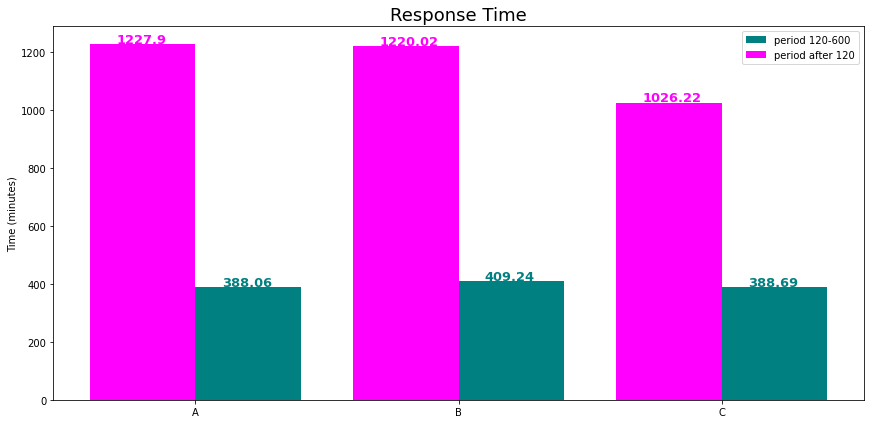

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig , ax = plt.subplots(nrows=1 , ncols=1,figsize=(12,6))
width=0.4

x=np.arange(1,4)
y1=df_RT1_C[['Average response time A' ,'Average response time B','Average response time C']].to_numpy()[0]
y2=df_RT2_C[['Average response time A' ,'Average response time B','Average response time C']].to_numpy()[0]

ax.bar(x=x+0.2 , height = y1 ,width=width,color='teal',label = 'period 120-600')
for i, v in enumerate(np.around(y1,2)):
    ax.text(i + 1.1 , v + 5,str(v), color='teal', fontweight='bold',fontsize=13)

ax.bar(x=x-0.2 , height = y2,width=width,color='magenta',label = 'period after 120')
for i, v in enumerate(np.around(y2,2)):
    ax.text(i + 0.7 , v + 5,str(v), color='magenta', fontweight='bold',fontsize=13)
    
ax.set_title('Response Time',fontsize=18)
plt.legend()
plt.tight_layout()
ax.set_xticks(x, ['A','B','C'])
ax.set_ylabel('Time (minutes)')
plt.savefig('ReponseTime.png',dpi=500)
plt.show()

#### Response Time at different time intervals

In [44]:
df_RT_C = df_RT_B.rename(columns={'Difference':'Difference A & B'}).copy()
for lower_hour,upper_hour,i in zip(range(120,600,60) , range(180,660,60),range(0,8)):
    rt = [tuple((x[1]-x[0]) for x in Demographic.values() if x[0]>=lower_hour and x[0]<=upper_hour) for Demographic in Demographic_list_C]
    df_RT_C.loc[i,'Mean Response Time C']=np.mean([np.mean(x) for x in rt])
df_RT_C['Difference A & C'] = df_RT_C['Mean Response Time A']-df_RT_C['Mean Response Time C']
df_RT_C

,From,To,Mean Response Time A,Mean Response Time B,Difference A & B,Mean Response Time C,Difference A & C
0,120.0,180.0,819.504482,949.150363,-129.645881,772.197530,47.306952
1,180.0,240.0,1014.855343,979.554666,35.300676,841.384884,173.470458
2,240.0,300.0,1057.178743,1105.899554,-48.720811,926.720438,130.458305
3,300.0,360.0,1192.379564,1147.056098,45.323467,992.144415,200.235149
4,360.0,420.0,1345.061535,1268.074443,76.987092,1076.251634,268.809902
5,420.0,480.0,1345.602613,1333.068974,12.533639,1123.750292,221.852321
6,480.0,540.0,1415.933808,1430.886503,-14.952695,1199.306211,216.627597
7,540.0,600.0,1524.877302,1495.801802,29.075500,1254.665677,270.211625


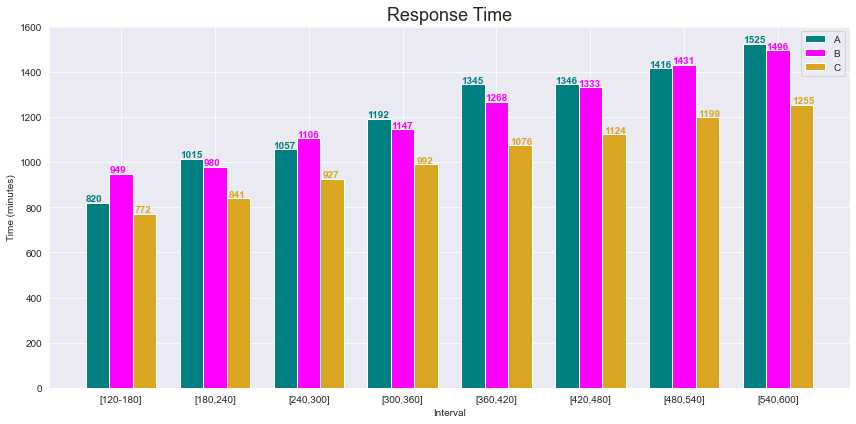

In [45]:
sns.set_style('darkgrid')
fig , ax = plt.subplots(nrows=1 , ncols=1,figsize=(12,6))
width=0.25

x=np.arange(8)
y1=df_RT_C['Mean Response Time A'].to_numpy()
ax.bar(x=x , height = y1 , width=width , color='teal' , label='A')
for i, v in enumerate(map(int,np.around(y1))):
    ax.text(i-0.125  , v + 5,str(v), color='teal', fontweight='bold',fontsize=10)

y2=df_RT_C['Mean Response Time B'].to_numpy()
ax.bar(x=x+width , height = y2 , width=width , color='magenta' , label='B')
for i, v in enumerate(map(int,np.around(y2))):
    ax.text(i-0.125 +width , v + 5,str(v), color='magenta', fontweight='bold',fontsize=10)


y3=df_RT_C['Mean Response Time C'].to_numpy()
ax.bar(x=x+width*2 , height = y3 , width=width , color='goldenrod' , label='C')
for i, v in enumerate(map(int,np.around(y3))):
    ax.text(i-0.1+width*2 , v + 5,str(v), color='goldenrod', fontweight='bold',fontsize=10)

    
ax.set_title('Response Time',fontsize=18)
plt.legend()
ax.set_xticks(x+width, ['[120-180]','[180,240]','[240,300]','[300,360]','[360,420]','[420,480]','[480,540]','[540,600]'])
ax.set_ylabel('Time (minutes)')
ax.set_xlabel('Interval')
plt.tight_layout()
plt.savefig('ReponseTimeDiffIntervals.png',dpi=500)
plt.show()

**Average waiting time for each machine**

In [46]:
df_MWT_C = df_MWT_B.rename(columns={'Difference':'Difference A & B'}).copy()
df_MWT_C['Mean Waiting Time C'] = np.mean(np.array(TWT_list_C))
df_MWT_C['Difference A & C'] = df_MWT_C['Mean Waiting Time A']-df_MWT_C['Mean Waiting Time C']
df_MWT_C

,Mean Waiting Time A,Mean Waiting Time B,Difference A & B,Mean Waiting Time C,Difference A & C
0,33945.758132,34608.086894,-662.328763,33578.436765,367.321366


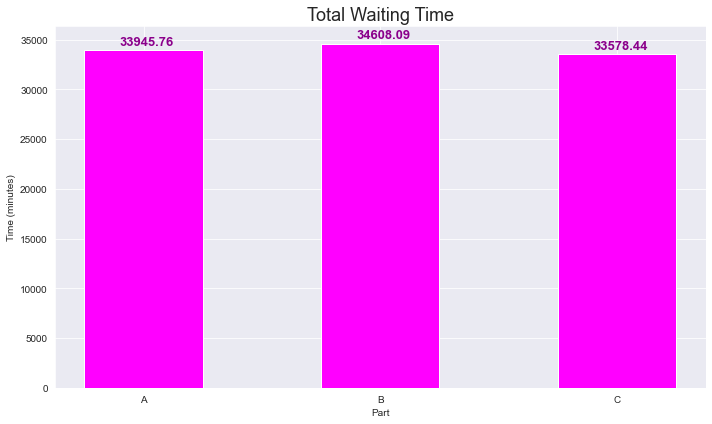

In [47]:
fig , ax = plt.subplots(nrows=1 , ncols=1,figsize=(10,6))

x=np.arange(3)
y=df_MWT_C[['Mean Waiting Time A' ,'Mean Waiting Time B','Mean Waiting Time C']].to_numpy()[0]

ax.bar(x=x , height = y ,width=0.5,color='magenta')
for i, v in enumerate(np.around(y,2)):
    ax.text(i-0.1 , v + 500,str(v), color='darkmagenta', fontweight='bold',fontsize=13)
    
ax.set_title('Total Waiting Time',fontsize=18)
ax.set_xticks(x, ['A','B','C'])
ax.set_xlabel('Part')
ax.set_ylabel('Time (minutes)')
plt.tight_layout()
plt.savefig('TtoalWaitingTime.png',dpi=500)
plt.show()

**Average service time at workstations** 

In [48]:
df_ST_C=df_ST_B.rename(columns={'Difference':'Difference A & B'}).copy()
mean_ST_A = np.mean(np.array([x[0] for x in SVR_list_C])/np.array([x[0] for x in N_list_C]))
mean_ST_B = np.mean(np.array([(x[1]+x[2]+x[3]) for x in SVR_list_C])/np.array([(x[1]+x[2]+x[3]) for x in N_list_C]))
mean_ST_C = np.mean(np.array([x[4] for x in SVR_list_C])/np.array([x[4] for x in N_list_C]))
mean_ST_D = np.mean(np.array([(x[5]+x[6]+x[7]+x[8]) for x in SVR_list_C])/np.array([(x[5]+x[6]+x[7]+x[8]) for x in N_list_C]))
mean_ST_E = np.mean(np.array([(x[9]+x[10]+x[11]) for x in SVR_list_C])/np.array([(x[9]+x[10]+x[11]) for x in N_list_C]))

df_ST_C['Average Service Time C'] = [mean_ST_A,mean_ST_B,mean_ST_C,mean_ST_D,mean_ST_E]
df_ST_C['Difference A & C'] = df_ST_C['Average Service Time A']-df_ST_C['Average Service Time C']
print('Note that this should not change, and even if the difference for a station is not 0, it is because of randomness of the simulation')
df_ST_C

Note that this should not change, and even if the difference for a station is not 0, it is because of randomness of the simulation


,Average Service Time A,Average Service Time B,Difference A & B,Average Service Time C,Difference A & C
A,11.653696,11.611909,0.041787,10.350031,1.303664
B,35.185439,34.825926,0.359513,32.293511,2.891928
C,19.430425,19.670418,-0.239992,14.758797,4.671629
D,45.179903,47.609340,-2.429437,42.290122,2.889781
E,37.862815,32.778940,5.083875,31.958561,5.904255


ANOVA on station C

In [49]:
lis1 = np.array([x[0] for x in SVR_list_A])/np.array([x[0] for x in N_list_A])
lis2 = np.array([(x[0]+x[1]) for x in SVR_list_B])/np.array([(x[0]+x[1]) for x in N_list_B])
lis3 = np.array([x[0] for x in SVR_list_C])/np.array([x[0] for x in N_list_C])
print(lis1.mean() , lis2.mean() , lis3.mean() )
st.f_oneway(lis1 , lis2 , lis3)

11.653695577649607 11.611908744729705 10.350031329508113


F_onewayResult(statistic=24.70635782787288, pvalue=5.621581065469955e-10)

**Average working time for each work station**

In [50]:
df_SVR_C=df_SVR_B.rename(columns={'Difference for whole station':'Difference for whole station A & B' ,
                                  'Difference per server':'Difference per server A & B' }).copy()

SVR_A = np.mean([x[0] for x in SVR_list_C])
SVR_B = np.mean([(x[1]+x[2]+x[3]) for x in SVR_list_C])
SVR_C = np.mean([x[4] for x in SVR_list_C])
SVR_D = np.mean([(x[5]+x[6]+x[7]+x[8]) for x in SVR_list_C])
SVR_E = np.mean([(x[9]+x[10]+x[11]) for x in SVR_list_C])

df_SVR_C['Average working time C (for the whole station)'] = [SVR_A,SVR_B,SVR_C,SVR_D,SVR_E]
df_SVR_C['Average working time C (per server in the station)'] = [SVR_A,SVR_B/3,SVR_C,SVR_D/4,SVR_E/3]
df_SVR_C['Difference for whole station A & C']=df_SVR_C['Average working time A (for the whole station)']-df_SVR_C['Average working time C (for the whole station)']
df_SVR_C['Difference per server A & C']=df_SVR_C['Average working time A (per server in the station)']-df_SVR_C['Average working time C (per server in the station)']
df_SVR_C

,Average working time A (for the whole station),Average working time A (per server in the station),Average working time B (for the whole station),Average working time B (per server in the station),Difference for whole station A & B,Difference per server A & B,Average working time C (for the whole station),Average working time C (per server in the station),Difference for whole station A & C,Difference per server A & C
A,474.769377,474.769377,952.211463,476.105732,-477.442086,-1.336355,471.244143,471.244143,3.525234,3.525234
B,1367.966168,455.988723,1375.215461,458.405154,-7.249293,-2.416431,1330.574099,443.524700,37.392068,12.464023
C,365.958671,365.958671,412.177506,412.177506,-46.218835,-46.218835,340.554851,340.554851,25.403820,25.403820
D,1585.357057,396.339264,1630.744794,407.686198,-45.387737,-11.346934,1567.791470,391.947867,17.565587,4.391397
E,1052.535653,350.845218,959.077749,319.692583,93.457904,31.152635,1018.458052,339.486017,34.077602,11.359201


The reason behind this negativity in row `D` and `E` is that, in state A, machines enter servers `D` and `E` a little bit late and they are idler (due to the queues that are formed in posterior workstations). 

But in state B and C, because we add either an additional server or decreased the service time, machines reach out to stations `D` and `E` faster and they work more.

In the following table you can see that in the specified time 120-600, more machines entered servers `D` and `E`.

In [51]:
df_N_C = df_N_B.copy()
df_N_C['Number of Machines PART C'] = [np.mean([x[0] for x in N_list_C]),
                                       np.mean([(x[1]+x[2]+x[3]) for x in N_list_C]),
                                       np.mean([x[4] for x in N_list_C]),
                                       np.mean([(x[5]+x[6]+x[7]+x[8]) for x in N_list_C]) ,
                                       np.mean([(x[9]+x[10]+x[11]) for x in N_list_C])]
df_N_C

,Number of Machines PART A,Number of Machines PART B,Number of Machines PART C
A,41.12,82.34,46.14
B,38.98,39.78,41.62
C,18.82,20.96,23.08
D,35.28,34.32,37.34
E,27.82,29.52,31.94


**Average total queue length for each work station**

In [52]:
df_Q_C=df_Q_B.rename(columns={'Difference':'Difference A & B'}).copy()

Queue_A=np.mean([x[0] for x in TotalQ_list_C])
Queue_B=np.mean([x[1] for x in TotalQ_list_C])
Queue_C=np.mean([x[2] for x in TotalQ_list_C])
Queue_D=np.mean([x[3] for x in TotalQ_list_C])
Queue_E=np.mean([x[4] for x in TotalQ_list_C])

df_Q_C['Average total queue length C'] = [Queue_A,Queue_B,Queue_C,Queue_D,Queue_E]
df_Q_C['Difference A & C']=df_Q_C.loc[:,'Average total queue length A'] - df_Q_C.loc[:,'Average total queue length C'] 
df_Q_C

,Average total queue length A,Average total queue length B,Difference A & B,Average total queue length C,Difference A & C
A,130.04,126.04,4.00,125.94,4.10
B,42.00,85.06,-43.06,46.14,-4.14
C,19.20,23.04,-3.84,18.44,0.76
D,21.04,24.36,-3.32,25.04,-4.00
E,18.68,11.28,7.40,15.66,3.02


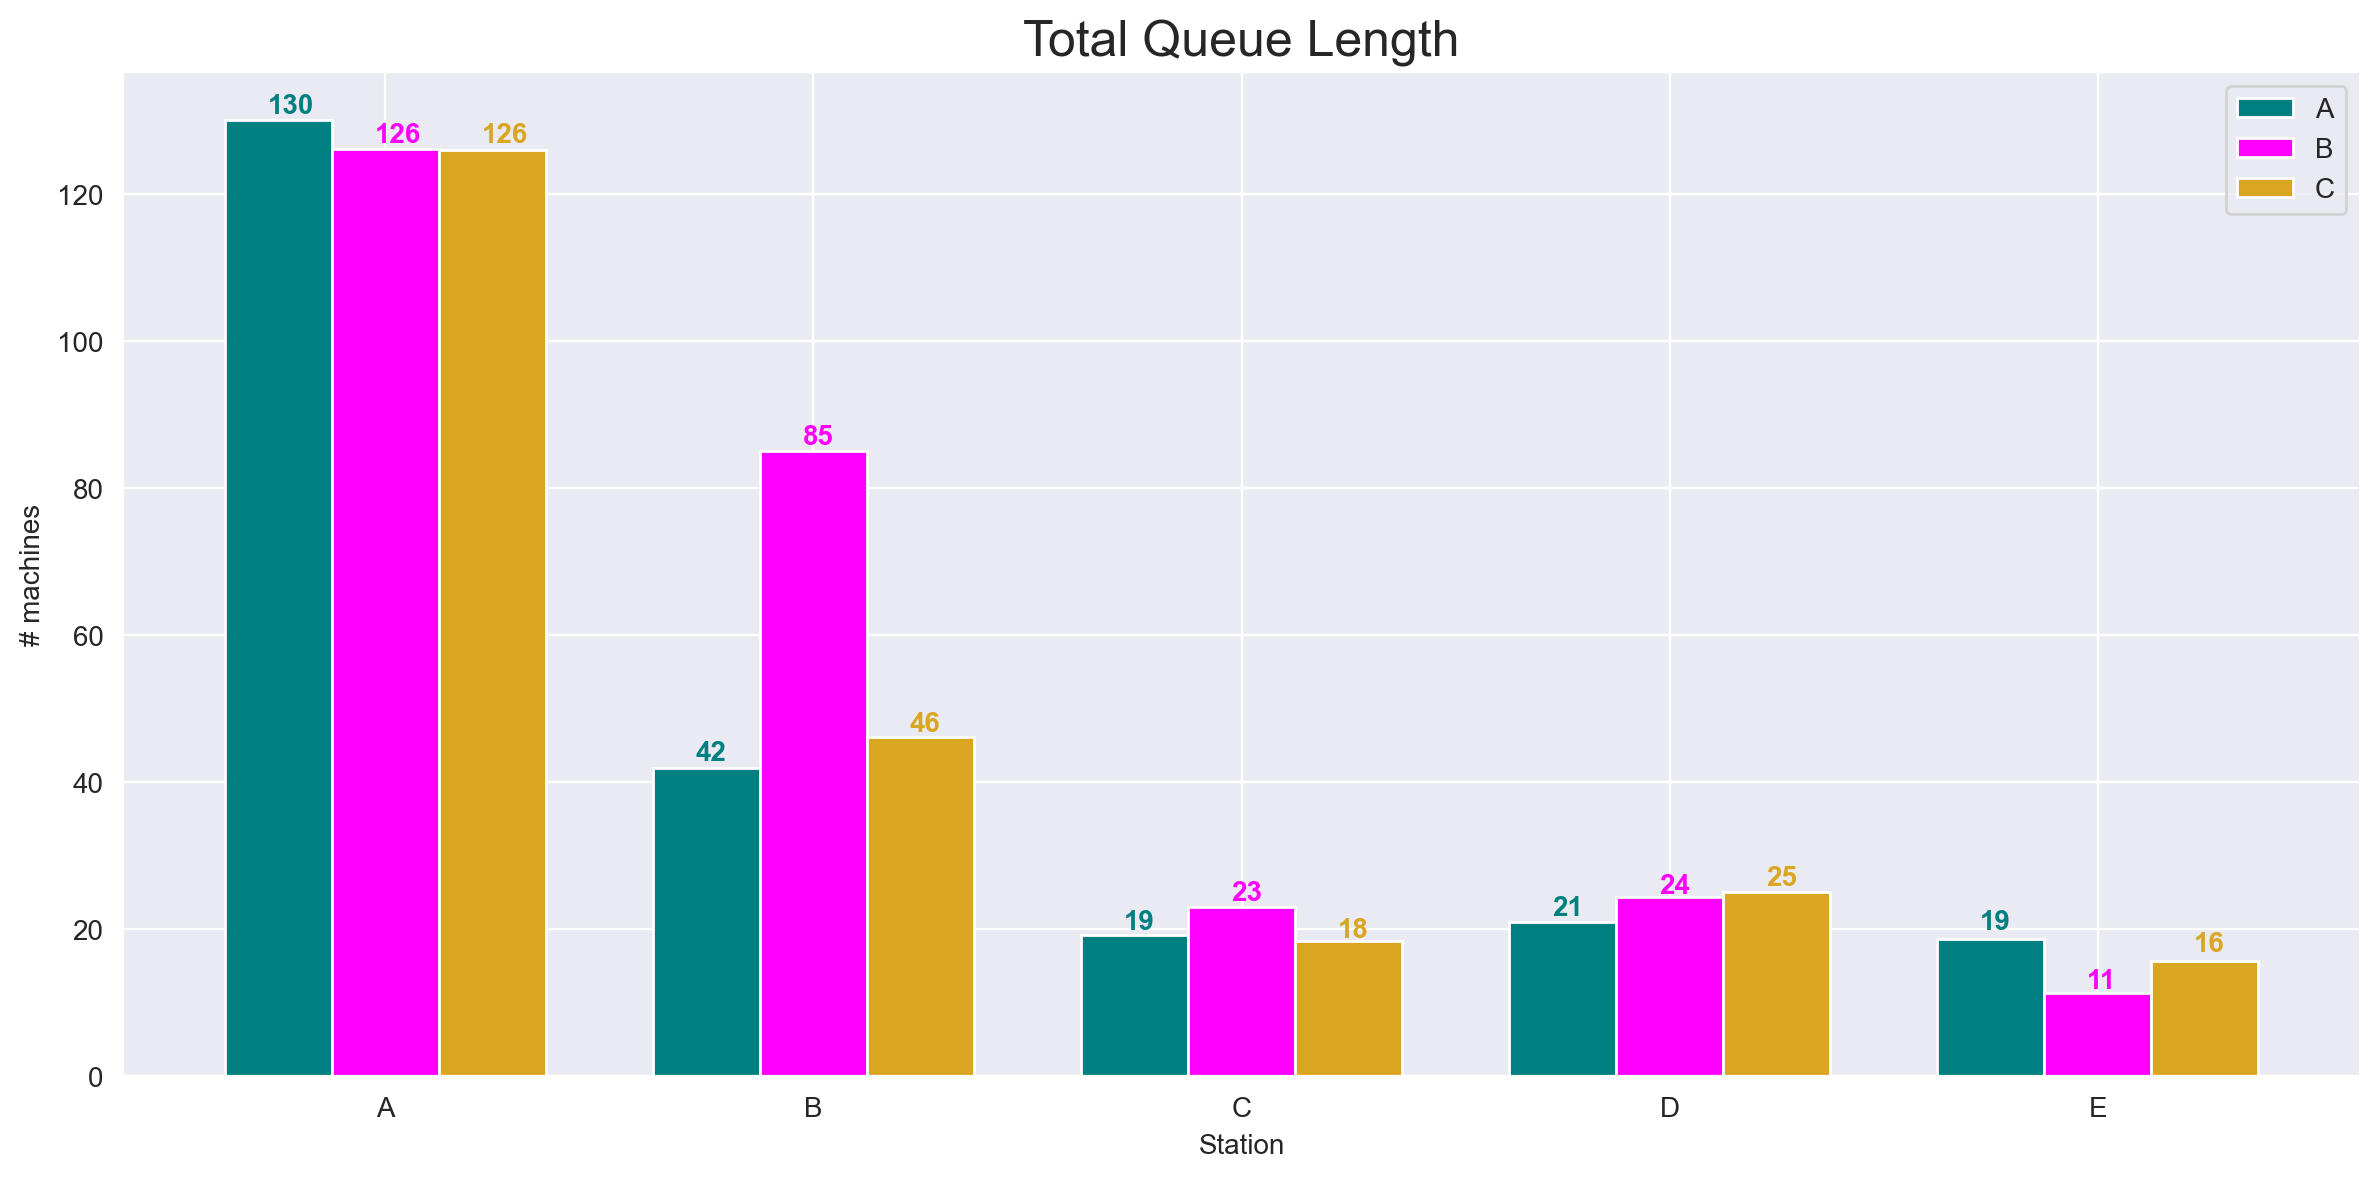

In [53]:
sns.set_style('darkgrid')
fig , ax = plt.subplots(nrows=1 , ncols=1,figsize=(12,6),dpi=200)
width=0.25

x=np.arange(5)
y1=df_Q_C['Average total queue length A'].to_numpy()
ax.bar(x=x , height = y1 , width=width , color='teal' , label='A')
for i, v in enumerate(map(int,np.around(y1))):
    ax.text(i-0.025  , v + 1,str(v), color='teal', fontweight='bold',fontsize=10)

y2=df_Q_C['Average total queue length B'].to_numpy()
ax.bar(x=x+width , height = y2 , width=width , color='magenta' , label='B')
for i, v in enumerate(map(int,np.around(y2))):
    ax.text(i +width-0.025 , v + 1,str(v), color='magenta', fontweight='bold',fontsize=10)


y3=df_Q_C['Average total queue length C'].to_numpy()
ax.bar(x=x+width*2 , height = y3 , width=width , color='goldenrod' , label='C')
for i, v in enumerate(map(int,np.around(y3))):
    ax.text(i+width*2-0.025 , v + 1,str(v), color='goldenrod', fontweight='bold',fontsize=10)

    
ax.set_title('Total Queue Length',fontsize=18)
plt.legend()
ax.set_xticks(x+width, ['A' , 'B' , 'C' , 'D' , 'E'])
ax.set_ylabel('# machines')
ax.set_xlabel('Station')
plt.savefig('QueueLength.png',dpi=500)
plt.tight_layout()
plt.show()

As it was previously mentioned, by adding another server to workstation `A` or decreasing service time in `C`, there will be more machines to be served in workstations `C` and `D` and `E` (in the specified time of 120-600), so there will be an increase in queue lengths, working time of each station and number of servers being busy simultaneously.

**Maximum waiting time in a queue**

In [54]:
df_max_WT_C=df_max_WT_B.rename(columns={'Difference':'Difference A & B'}).copy()
df_max_WT_C['Max WT PART C'] = np.mean(max_WT_list_C)
df_max_WT_C['Difference A & C'] = df_max_WT_C['Max WT PART A'] - df_max_WT_C['Max WT PART C']
df_max_WT_C

,Max WT PART A,Max WT PART B,Difference A & B,Max WT PART C,Difference A & C
0,480.0,480.0,0.0,480.0,0.0


Obviously maximum waiting time occurred in workstation C.

Also we can infer that decreasing service time of server C doesn't change maximum waiting time.